# Exploring ACS Race data in Oakland, CA
Here I will be exploring race table data from the American Community Survey. My focus is on Oakland, California. Our final project will explore both Race and Income data. 

To begin, I will import the pandas, geopandas, and contextily libraries to explore the data and eventually add basemaps

In [6]:
import pandas as pd

In [7]:
import geopandas as gpd

In [8]:
import contextily as ctx

In [9]:
import matplotlib.pyplot as plt

now I will import my dataset (table B02001 from the ACS)

In [10]:
oakrace = gpd.read_file('elliott.geojson')

After import, let's explore the dataset by looking through the file. First I'll see how many rows and column's I get, then go through and look at the details:

In [11]:
oakrace.shape

(115, 23)

In [12]:
oakrace.head()

,geoid,name,B02001001,"B02001001, Error",B02001002,"B02001002, Error",B02001003,"B02001003, Error",B02001004,"B02001004, Error",...,"B02001006, Error",B02001007,"B02001007, Error",B02001008,"B02001008, Error",B02001009,"B02001009, Error",B02001010,"B02001010, Error",geometry
0,14000US06001400100,"Census Tract 4001, Alameda, CA",3120.0,208.0,2394.0,236.0,107.0,68.0,0.0,12.0,...,12.0,34.0,33.0,187.0,126.0,0.0,12.0,187.0,126.0,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466..."
1,14000US06001400200,"Census Tract 4002, Alameda, CA",2007.0,120.0,1577.0,155.0,52.0,48.0,4.0,7.0,...,12.0,17.0,16.0,186.0,77.0,14.0,25.0,172.0,73.0,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577..."
2,14000US06001400300,"Census Tract 4003, Alameda, CA",5051.0,309.0,3748.0,387.0,459.0,179.0,0.0,17.0,...,39.0,134.0,146.0,97.0,82.0,0.0,17.0,97.0,82.0,"MULTIPOLYGON (((-122.26563 37.83764, -122.2655..."
3,14000US06001400400,"Census Tract 4004, Alameda, CA",4007.0,344.0,2748.0,268.0,291.0,169.0,44.0,41.0,...,12.0,199.0,212.0,305.0,124.0,13.0,21.0,292.0,122.0,"MULTIPOLYGON (((-122.26183 37.84162, -122.2618..."
4,14000US06001400500,"Census Tract 4005, Alameda, CA",4124.0,357.0,2036.0,224.0,882.0,202.0,0.0,12.0,...,33.0,110.0,85.0,628.0,275.0,39.0,31.0,589.0,272.0,"MULTIPOLYGON (((-122.26951 37.84858, -122.2693..."


In [13]:
oakrace.tail()

,geoid,name,B02001001,"B02001001, Error",B02001002,"B02001002, Error",B02001003,"B02001003, Error",B02001004,"B02001004, Error",...,"B02001006, Error",B02001007,"B02001007, Error",B02001008,"B02001008, Error",B02001009,"B02001009, Error",B02001010,"B02001010, Error",geometry
110,14000US06001981900,"Census Tract 9819, Alameda, CA",58.0,43.0,58.0,43.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-122.34668 37.81103, -122.3441..."
111,14000US06001982000,"Census Tract 9820, Alameda, CA",63.0,28.0,14.0,14.0,23.0,26.0,2.0,3.0,...,12.0,0.0,12.0,4.0,6.0,4.0,6.0,0.0,12.0,"MULTIPOLYGON (((-122.31439 37.79484, -122.3135..."
112,14000US06001983200,"Census Tract 9832, Alameda, CA",583.0,68.0,341.0,60.0,53.0,38.0,9.0,12.0,...,4.0,19.0,20.0,20.0,14.0,0.0,12.0,20.0,14.0,"MULTIPOLYGON (((-122.28417 37.79402, -122.2838..."
113,14000US06001990000,"Census Tract 9900, Alameda, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-122.09859 37.49488, -122.0910..."
114,16000US0653000,"Oakland, CA",425097.0,103.0,150827.0,2414.0,100966.0,2371.0,3832.0,584.0,...,490.0,72004.0,2307.0,29192.0,1542.0,5258.0,668.0,23934.0,1475.0,"MULTIPOLYGON (((-122.35588 37.83573, -122.3507..."


In [14]:
oakrace.sample(10)

,geoid,name,B02001001,"B02001001, Error",B02001002,"B02001002, Error",B02001003,"B02001003, Error",B02001004,"B02001004, Error",...,"B02001006, Error",B02001007,"B02001007, Error",B02001008,"B02001008, Error",B02001009,"B02001009, Error",B02001010,"B02001010, Error",geometry
113,14000US06001990000,"Census Tract 9900, Alameda, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-122.09859 37.49488, -122.0910..."
75,14000US06001407102,"Census Tract 4071.02, Alameda, CA",4387.0,381.0,611.0,195.0,1143.0,260.0,121.0,98.0,...,19.0,1471.0,394.0,403.0,184.0,59.0,55.0,344.0,176.0,"MULTIPOLYGON (((-122.21667 37.77904, -122.2165..."
102,14000US06001409800,"Census Tract 4098, Alameda, CA",3516.0,512.0,925.0,278.0,1975.0,417.0,11.0,15.0,...,12.0,120.0,98.0,200.0,115.0,24.0,40.0,176.0,109.0,"MULTIPOLYGON (((-122.16494 37.76268, -122.1648..."
61,14000US06001406000,"Census Tract 4060, Alameda, CA",3796.0,372.0,1148.0,346.0,525.0,228.0,6.0,10.0,...,7.0,444.0,303.0,80.0,71.0,8.0,14.0,72.0,69.0,"MULTIPOLYGON (((-122.26735 37.78872, -122.2644..."
94,14000US06001409000,"Census Tract 4090, Alameda, CA",4687.0,593.0,440.0,195.0,1638.0,427.0,48.0,75.0,...,10.0,2126.0,781.0,208.0,203.0,148.0,192.0,60.0,61.0,"MULTIPOLYGON (((-122.25550 37.72177, -122.2515..."
110,14000US06001981900,"Census Tract 9819, Alameda, CA",58.0,43.0,58.0,43.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-122.34668 37.81103, -122.3441..."
104,14000US06001410000,"Census Tract 4100, Alameda, CA",3242.0,342.0,1054.0,205.0,1311.0,283.0,8.0,13.0,...,43.0,111.0,88.0,571.0,284.0,114.0,94.0,457.0,264.0,"MULTIPOLYGON (((-122.15170 37.75191, -122.1516..."
63,14000US06001406201,"Census Tract 4062.01, Alameda, CA",4995.0,504.0,567.0,236.0,1056.0,398.0,79.0,61.0,...,28.0,1681.0,477.0,170.0,93.0,9.0,15.0,161.0,92.0,"MULTIPOLYGON (((-122.23590 37.78341, -122.2351..."
52,14000US06001405302,"Census Tract 4053.02, Alameda, CA",2373.0,247.0,861.0,202.0,312.0,134.0,8.0,13.0,...,12.0,53.0,35.0,135.0,82.0,15.0,18.0,120.0,77.0,"MULTIPOLYGON (((-122.25952 37.79854, -122.2595..."
57,14000US06001405700,"Census Tract 4057, Alameda, CA",3531.0,326.0,620.0,188.0,747.0,313.0,17.0,21.0,...,12.0,303.0,301.0,219.0,120.0,46.0,58.0,173.0,100.0,"MULTIPOLYGON (((-122.23556 37.79899, -122.2355..."


Seems like the final 2 rows in my dataset contains all of Oakland, CA and a census block with 0 population so I should probably remove those lines if I am going to explore census tracts exclusively

In [15]:
oakrace=oakrace.drop(114)

In [16]:
oakrace=oakrace.drop(113)

okay so now let's check to see if that worked:

In [17]:
oakrace.tail()

,geoid,name,B02001001,"B02001001, Error",B02001002,"B02001002, Error",B02001003,"B02001003, Error",B02001004,"B02001004, Error",...,"B02001006, Error",B02001007,"B02001007, Error",B02001008,"B02001008, Error",B02001009,"B02001009, Error",B02001010,"B02001010, Error",geometry
108,14000US06001410400,"Census Tract 4104, Alameda, CA",4477.0,388.0,814.0,214.0,1505.0,310.0,123.0,131.0,...,23.0,1376.0,353.0,150.0,70.0,46.0,49.0,104.0,67.0,"MULTIPOLYGON (((-122.16921 37.74276, -122.1691..."
109,14000US06001410500,"Census Tract 4105, Alameda, CA",2705.0,285.0,547.0,203.0,1663.0,307.0,7.0,11.0,...,26.0,110.0,98.0,60.0,34.0,4.0,6.0,56.0,33.0,"MULTIPOLYGON (((-122.29360 37.80530, -122.2935..."
110,14000US06001981900,"Census Tract 9819, Alameda, CA",58.0,43.0,58.0,43.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-122.34668 37.81103, -122.3441..."
111,14000US06001982000,"Census Tract 9820, Alameda, CA",63.0,28.0,14.0,14.0,23.0,26.0,2.0,3.0,...,12.0,0.0,12.0,4.0,6.0,4.0,6.0,0.0,12.0,"MULTIPOLYGON (((-122.31439 37.79484, -122.3135..."
112,14000US06001983200,"Census Tract 9832, Alameda, CA",583.0,68.0,341.0,60.0,53.0,38.0,9.0,12.0,...,4.0,19.0,20.0,20.0,14.0,0.0,12.0,20.0,14.0,"MULTIPOLYGON (((-122.28417 37.79402, -122.2838..."


looking good so let's move on.

<AxesSubplot:>

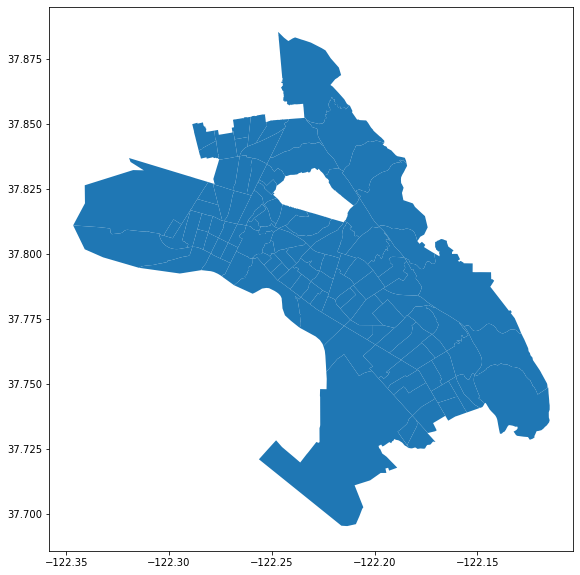

In [18]:
oakrace.plot(figsize=(10,10))

I think now I'll rename columns and display them in their entirety so its easier for me to read

In [19]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [20]:
oakrace.head()

,geoid,name,B02001001,"B02001001, Error",B02001002,"B02001002, Error",B02001003,"B02001003, Error",B02001004,"B02001004, Error",B02001005,"B02001005, Error",B02001006,"B02001006, Error",B02001007,"B02001007, Error",B02001008,"B02001008, Error",B02001009,"B02001009, Error",B02001010,"B02001010, Error",geometry
0,14000US06001400100,"Census Tract 4001, Alameda, CA",3120.0,208.0,2394.0,236.0,107.0,68.0,0.0,12.0,398.0,112.0,0.0,12.0,34.0,33.0,187.0,126.0,0.0,12.0,187.0,126.0,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466..."
1,14000US06001400200,"Census Tract 4002, Alameda, CA",2007.0,120.0,1577.0,155.0,52.0,48.0,4.0,7.0,171.0,69.0,0.0,12.0,17.0,16.0,186.0,77.0,14.0,25.0,172.0,73.0,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577..."
2,14000US06001400300,"Census Tract 4003, Alameda, CA",5051.0,309.0,3748.0,387.0,459.0,179.0,0.0,17.0,590.0,140.0,23.0,39.0,134.0,146.0,97.0,82.0,0.0,17.0,97.0,82.0,"MULTIPOLYGON (((-122.26563 37.83764, -122.2655..."
3,14000US06001400400,"Census Tract 4004, Alameda, CA",4007.0,344.0,2748.0,268.0,291.0,169.0,44.0,41.0,420.0,133.0,0.0,12.0,199.0,212.0,305.0,124.0,13.0,21.0,292.0,122.0,"MULTIPOLYGON (((-122.26183 37.84162, -122.2618..."
4,14000US06001400500,"Census Tract 4005, Alameda, CA",4124.0,357.0,2036.0,224.0,882.0,202.0,0.0,12.0,446.0,176.0,22.0,33.0,110.0,85.0,628.0,275.0,39.0,31.0,589.0,272.0,"MULTIPOLYGON (((-122.26951 37.84858, -122.2693..."


In [21]:
list(oakrace)

['geoid',
 'name',
 'B02001001',
 'B02001001, Error',
 'B02001002',
 'B02001002, Error',
 'B02001003',
 'B02001003, Error',
 'B02001004',
 'B02001004, Error',
 'B02001005',
 'B02001005, Error',
 'B02001006',
 'B02001006, Error',
 'B02001007',
 'B02001007, Error',
 'B02001008',
 'B02001008, Error',
 'B02001009',
 'B02001009, Error',
 'B02001010',
 'B02001010, Error',
 'geometry']

Time to clean up the columns and rename them:

In [22]:
columns_to_keep = ['geoid', 'name', 'B02001001',
'B02001002',
'B02001003',
'B02001004',
'B02001005',
'B02001006',
'B02001007',
'B02001008',
'B02001009',
'B02001010','geometry']

In [23]:
oakrace = oakrace[columns_to_keep]

In [24]:
oakrace.sample()

,geoid,name,B02001001,B02001002,B02001003,B02001004,B02001005,B02001006,B02001007,B02001008,B02001009,B02001010,geometry
0,14000US06001400100,"Census Tract 4001, Alameda, CA",3120.0,2394.0,107.0,0.0,398.0,0.0,34.0,187.0,0.0,187.0,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466..."


In [25]:
oakrace.columns = ['geoid', 'name', 
                   'Total', 
                   'White', 
                   'Black or African American', 
                   'American Indian and Alaska Native', 
                   'Asian',
                   'Native Hawaiian and Other Pacific Islander',
                   'Some other race',
                   'Two or more races',
                   'Two races including Some other race',
                   'Two races excluding Some other race, and three or more races',
                  'geometry']

In [26]:
oakrace.head()

,geoid,name,Total,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Some other race,Two or more races,Two races including Some other race,"Two races excluding Some other race, and three or more races",geometry
0,14000US06001400100,"Census Tract 4001, Alameda, CA",3120.0,2394.0,107.0,0.0,398.0,0.0,34.0,187.0,0.0,187.0,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466..."
1,14000US06001400200,"Census Tract 4002, Alameda, CA",2007.0,1577.0,52.0,4.0,171.0,0.0,17.0,186.0,14.0,172.0,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577..."
2,14000US06001400300,"Census Tract 4003, Alameda, CA",5051.0,3748.0,459.0,0.0,590.0,23.0,134.0,97.0,0.0,97.0,"MULTIPOLYGON (((-122.26563 37.83764, -122.2655..."
3,14000US06001400400,"Census Tract 4004, Alameda, CA",4007.0,2748.0,291.0,44.0,420.0,0.0,199.0,305.0,13.0,292.0,"MULTIPOLYGON (((-122.26183 37.84162, -122.2618..."
4,14000US06001400500,"Census Tract 4005, Alameda, CA",4124.0,2036.0,882.0,0.0,446.0,22.0,110.0,628.0,39.0,589.0,"MULTIPOLYGON (((-122.26951 37.84858, -122.2693..."


In [27]:
oakrace['Total'].head()

0    3120.0
1    2007.0
2    5051.0
3    4007.0
4    4124.0
Name: Total, dtype: float64

<AxesSubplot:ylabel='Frequency'>

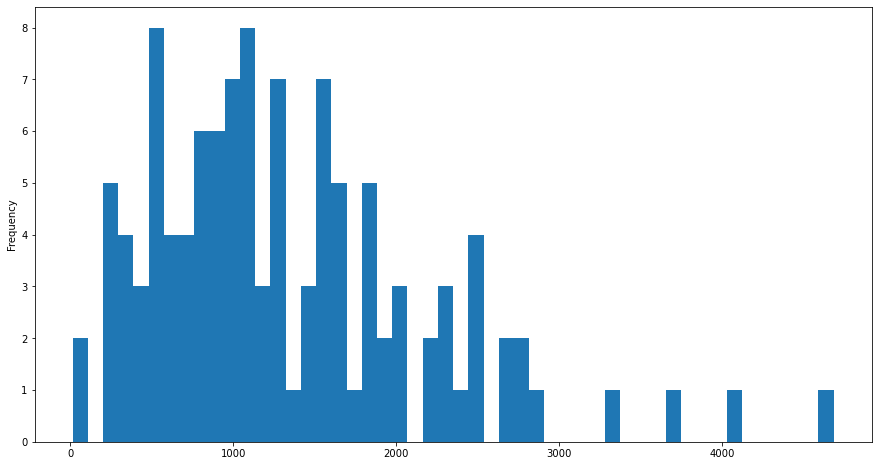

In [28]:
oakrace['White'].plot.hist(figsize=(15,8),bins=50)

I'm now realizing that I should have used the B03002 table, which includes data for Hispanic/Latino, so I will be using that table for our final project

Here I'll be plotting the White neighbourhoods on a map by census tract:

<AxesSubplot:>

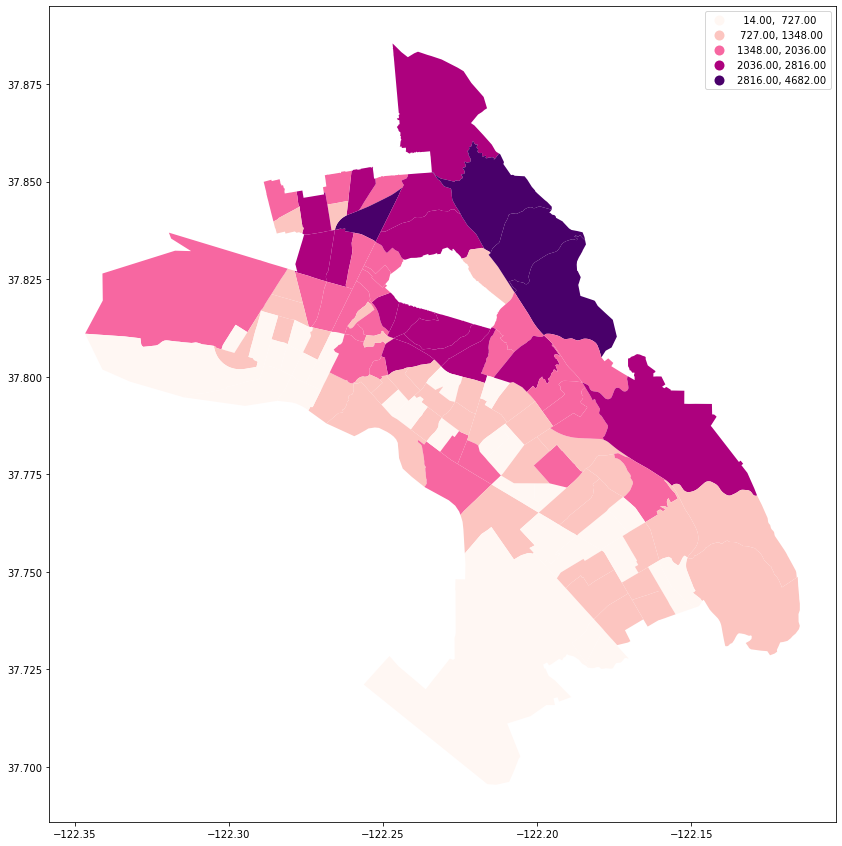

In [29]:
oakrace.plot(figsize=(15,15),
                 column='White',
                 legend=True, 
                 scheme='NaturalBreaks',
             cmap='RdPu')

so.. looking at this visualization I can see that a majority of the White poplulation exists in the northern areas of Oakland

and I can overlay census tracts containing greater than/less than 2000 White residents over a basemap of Oakland:

In [30]:
oakrace_web_mercator = oakrace.to_crs(epsg=3857)

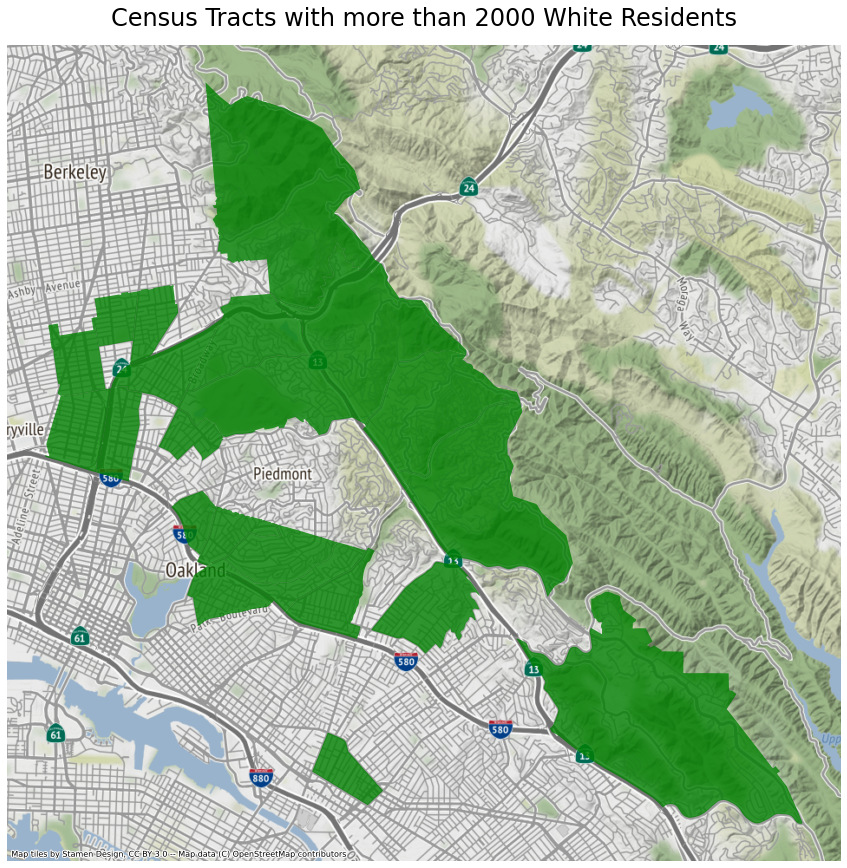

In [31]:
oakrace_web_mercator = oakrace.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(15, 15))

oakrace_web_mercator[oakrace_web_mercator['White'] > 2000].plot(
                                                               ax=ax, 
                                                               color="green",
                                                               alpha=0.8
)

ax.axis('off')

ax.set_title('Census Tracts with more than 2000 White Residents',fontsize=24,pad=20)


ctx.add_basemap(ax)

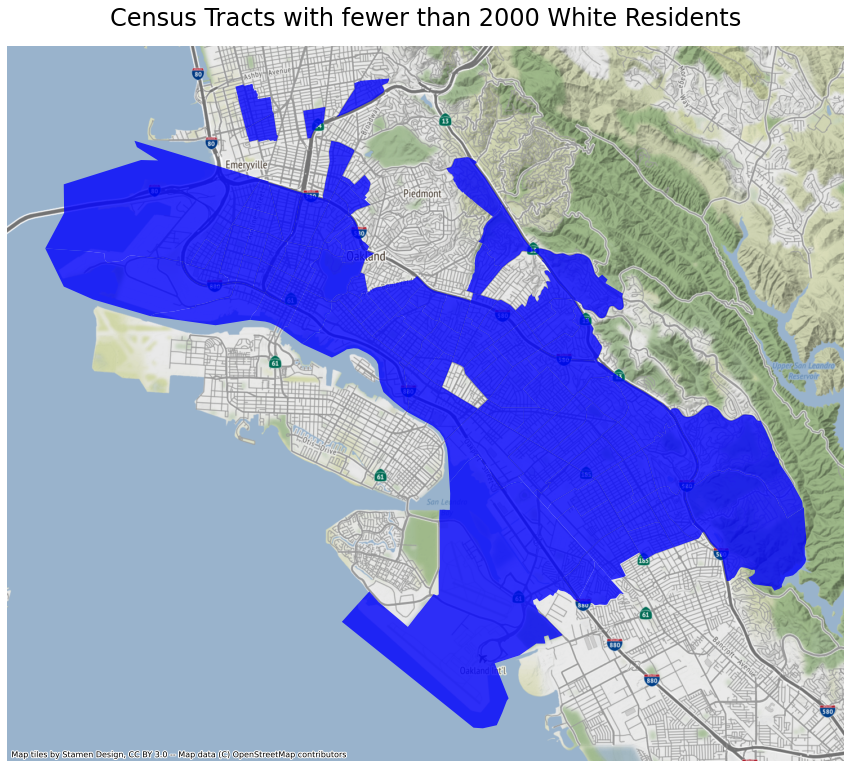

In [32]:
oakrace_web_mercator = oakrace.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(15, 15))

oakrace_web_mercator[oakrace_web_mercator['White'] < 2000].plot(
                                                               ax=ax, 
                                                               color="blue",
                                                               alpha=0.8
)

ax.axis('off')

ax.set_title('Census Tracts with fewer than 2000 White Residents',fontsize=24,pad=20)


ctx.add_basemap(ax)

Next time it will be more helpful to convert to percentages using the 

- 'oakrace['Percent White'] = oakrace['White']/oakrace['Total']*100'

command


#### Lots more to explore, using both the proper table and convsersion of data into percentages will allow our visualizations to make a bit more sense.